# Exercise Eight: Cultural Data
For this exercise, pick a dataset of current or historical cultural data available in CSV format from one of the suggeted sources, or your own research. This will be easiest if your data includes some element of information over time. You'll be using the "group by" methods we discussed this week to make comparisons within the dataset: you might group by geography, party affiliation, age, gender, or other information marked in the dataset.

Your annotated code should include headings, and discuss your findings as well as the limitations in what you can visualize using this approach. This exercise should:

Import your selected structured CSV data
Use Pandas to note any preliminary trends in the CSV as a dataframe
Use "group by" to break down at least two different subsets of data
Plot a comparison between the grouped data (this will be easiest over time)
Use one additional form of analysis or visualization from any we've tried so far 


## Stage One: Import Structured CSV Data (bonus: from multiple files)



In [18]:

import pandas as pd
import os
path = "busters/"
years = []
df_list = []

with os.scandir(path) as entries:
    for entry in entries:
        years.append(entry.name)
        temp_df = pd.read_csv(f'{path}{entry.name}')
        df_list.append(temp_df)
        
print(years[0])
print(df_list[0].head())

blockbusters (1).csv
  Main_Genre    Genre_2    Genre_3  imdb_rating  length  rank_in_year rating  \
0     Action  Adventure      Drama          7.4     135             1  PG-13   
1     Action  Adventure     Sci-Fi          8.5     156             2  PG-13   
2  Animation     Action  Adventure          7.8     118             3     PG   
3     Action  Adventure      Drama          6.2     129             4  PG-13   
4     Action     Comedy        NaN          7.8     119             5      R   

                 studio                           title worldwide_gross  year  
0  Walt Disney Pictures                   Black Panther    $700,059,566  2018  
1  Walt Disney Pictures          Avengers: Infinity War    $678,815,482  2018  
2                 Pixar                   Incredibles 2    $608,581,744  2018  
3    Universal Pictures  Jurassic World: Fallen Kingdom    $416,769,345  2018  
4      20th Century Fox                      Deadpool 2    $318,491,426  2018  


## Stage Two: Explore and note differences in headings / datatypes over the years

In [19]:
[print(df.dtypes) for df in df_list]


Main_Genre          object
Genre_2             object
Genre_3             object
imdb_rating        float64
length               int64
rank_in_year         int64
rating              object
studio              object
title               object
worldwide_gross     object
year                 int64
dtype: object


[None]

In [20]:
[print(df['Main_Genre'].head()) for df in df_list]


0       Action
1       Action
2    Animation
3       Action
4       Action
Name: Main_Genre, dtype: object


[None]

## Stage Three: Use Groupby to Explore (by Region)
Note this sample shows only one example, two are required for the exercise itself

In [65]:
close_region = df_list[0].groupby('studio')
close_region.get_group('Walt Disney Pictures').head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
6,Action,Comedy,NaN,7.2,118,7,PG-13,Walt Disney Pictures,Ant-Man and the Wasp,"$216,648,740",2018
7,Action,Adventure,Drama,7.0,135,8,PG-13,Walt Disney Pictures,Solo: A Star Wars Story,"$213,767,512",2018
10,Action,Adventure,Drama,7.2,152,1,PG-13,Walt Disney Pictures,Star Wars: The Last Jedi,"$620,181,382",2017


In [67]:
print(close_region['imdb_rating'].mean())
print(close_region['rank_in_year'].mean())

studio
20th Century Fox                 7.127083
Columbia Pictures                6.741667
DreamWorks                       7.266667
Embassy Pictures                 7.000000
IFC Films                        6.600000
Lionsgate Films                  6.550000
Metro-Goldwyn-Mayer              7.255882
National Air and Space Museum    7.000000
Newmarket Films                  7.100000
Paramount Pictures               6.965517
Pixar                            8.022222
Sony Pictures                    6.905882
Sunn Classic Pictures            4.600000
Universal Pictures               6.876786
Walt Disney Pictures             7.235385
Warner Bros                      7.206897
Name: imdb_rating, dtype: float64
studio
20th Century Fox                  5.437500
Columbia Pictures                 6.111111
DreamWorks                        5.666667
Embassy Pictures                 10.000000
IFC Films                         9.000000
Lionsgate Films                   5.100000
Metro-Goldwyn-Mayer   

## Stage Four: Plot Grouped Data¶


Adventure


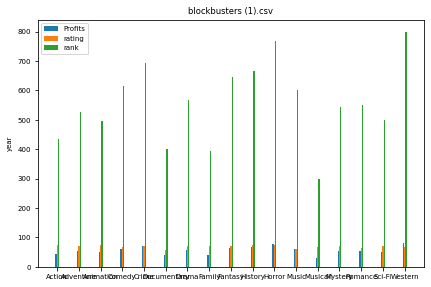

In [60]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 7})

regions = close_region['Genre_2'].unique()
names = [str(i) for i in regions]
names = [name.replace(' ', '\n') for name in names]
names = [name.replace("['",'') for name in names]
names = [name.replace("']",'') for name in names]

print(names[1])
x = np.arange(len(names))
width = 1/len(names)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, close_region['rank_in_year'].mean()*10, width, label='Profits')
rects2 = ax.bar(x, close_region['imdb_rating'].mean()*10, width, label='rating')
rects3 = ax.bar(x + width, close_region['rank_in_year'].mean()*100, width, label='rank')


ax.set_ylabel('year')
ax.set_title(years[0])
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()
fig.tight_layout()

plt.show()

## Bonus Stage:

